# Sentiment Analysis with Frequency Method

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import copy , math 
from bs4 import BeautifulSoup
import re
import nltk 
import spacy 
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords 
from textblob import TextBlob 
from textblob import Word 


C:\Users\babul\AppData\Local\Temp\ipykernel_7448\3066946799.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [5]:
df = pd.read_csv('Twitter_Data.csv')
df.sample(7)

,clean_text,category
91340,since economy shambles modi wants save soldier...,1.0
47050,india elite space power have antisatellite wea...,0.0
112675,narendra modi heres how vivek oberoi transform...,0.0
150555,modi the extent organised corruption india and...,1.0
153256,mem please request you meet modi please please,0.0
71763,’ just listen this interview your husband sham...,1.0
101224,modi pakistan centric disgusting that jobs agr...,-1.0


In [6]:
print(f'the shape of dataset is : {df.shape}')

print(f'the columns are : {df.columns}')

the shape of dataset is : (162980, 2)
the columns are : Index(['clean_text', 'category'], dtype='object')


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


In [8]:
df['category'].value_counts()

category
 1.0    72250
 0.0    55213
-1.0    35510
Name: count, dtype: int64

In [9]:
# Missing rows removed 

df.dropna(inplace=True)
df

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
...,...,...
162975,why these 456 crores paid neerav modi not reco...,-1.0
162976,dear rss terrorist payal gawar what about modi...,-1.0
162977,did you cover her interaction forum where she ...,0.0
162978,there big project came into india modi dream p...,0.0


In [81]:
# Creating a copy of dataframe df , named new_df which contains only 100000 examples

new_dataframe_class_0 = df[df['category'] == -1].head(3500)
new_dataframe_class_1 = df[df['category'] == 1].head(3500)

# Concatenate the two subsets to create the final DataFrame with equal counts of both classes
new_df = pd.concat([new_dataframe_class_0, new_dataframe_class_1])

# Shuffle the rows to randomize the order
new_df = new_df.sample(frac=1).reset_index(drop=True)
new_df

,clean_text,category
0,modi didnt tell them his hate speeches did con...,-1.0
1,looks like this witch can never get enough fal...,-1.0
2,better rahul contests from pakistan you have m...,1.0
3,pledge your first vote for modi,1.0
4,you think the same bjp 2004 social media has c...,1.0
...,...,...
6995,too much rafale rafale rafale congress needed ...,1.0
6996,tag this fast growing youtuber cared abt this ...,-1.0
6997,sure sir that our responsibility save our coun...,1.0
6998,modi will continue india aagar kisika doubt ha...,1.0


In [82]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   clean_text  7000 non-null   object 
 1   category    7000 non-null   float64
dtypes: float64(1), object(1)
memory usage: 109.5+ KB


In [83]:
#  Final DataFrame

new_df['category'] = new_df['category'].replace(-1, 0)

new_df

,clean_text,category
0,modi didnt tell them his hate speeches did con...,0.0
1,looks like this witch can never get enough fal...,0.0
2,better rahul contests from pakistan you have m...,1.0
3,pledge your first vote for modi,1.0
4,you think the same bjp 2004 social media has c...,1.0
...,...,...
6995,too much rafale rafale rafale congress needed ...,1.0
6996,tag this fast growing youtuber cared abt this ...,0.0
6997,sure sir that our responsibility save our coun...,1.0
6998,modi will continue india aagar kisika doubt ha...,1.0


In [84]:
# Removing HTML strips 
def strip_html(text):
    soup = BeautifulSoup(text, 'html.parser')
    return soup.get_text()

#removing the square brackets 

def remove_square_brackets(text):
    return re.sub('\[[^]]*\]','', text)

#removing the noisy text 

def denoise_text(text):
    text = strip_html(text)
    text = remove_square_brackets(text)
    return text

#Applying the function 

new_df['clean_text'] = new_df['clean_text'].apply(denoise_text)

new_df['clean_text']

C:\Users\babul\AppData\Local\Temp\ipykernel_7448\4164170598.py:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, 'html.parser')


0       modi didnt tell them his hate speeches did con...
1       looks like this witch can never get enough fal...
2       better rahul contests from pakistan you have m...
3                        pledge your first vote for modi 
4       you think the same bjp 2004 social media has c...
                              ...                        
6995    too much rafale rafale rafale congress needed ...
6996    tag this fast growing youtuber cared abt this ...
6997    sure sir that our responsibility save our coun...
6998    modi will continue india aagar kisika doubt ha...
6999    his great grandfather promised his grandma pro...
Name: clean_text, Length: 7000, dtype: object

In [85]:
# Function to remove special character 

def remove_special_character(text, remove_digits = True):
    pattern = r'[^a-zA-z0-9\s]'
    text = re.sub(pattern, '', text)
    return text 

new_df['clean_text'] = new_df['clean_text'].apply(remove_special_character)

new_df['clean_text']

0       modi didnt tell them his hate speeches did con...
1       looks like this witch can never get enough fal...
2       better rahul contests from pakistan you have m...
3                        pledge your first vote for modi 
4       you think the same bjp 2004 social media has c...
                              ...                        
6995    too much rafale rafale rafale congress needed ...
6996    tag this fast growing youtuber cared abt this ...
6997    sure sir that our responsibility save our coun...
6998    modi will continue india aagar kisika doubt ha...
6999    his great grandfather promised his grandma pro...
Name: clean_text, Length: 7000, dtype: object

In [86]:
class SpaCyTokenizer:
    def __init__(self):
        self.nlp = spacy.load("en_core_web_sm")

    def tokenize(self, text):
        doc = self.nlp(text)
        return [token.text for token in doc]

# Setting English StopWords 

In [87]:

default_stopwords = set(stopwords.words('english'))

custom_stopwords = set(['not', 'no', 'against', 'nor'])

stopword_list = default_stopwords - custom_stopwords

print(stopword_list)

tokenizer = SpaCyTokenizer()


def remove_stopwords(text, is_lower_case = False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]

    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text 

new_df['clean_text'] = new_df['clean_text'].apply(remove_stopwords)

new_df['clean_text']

{'its', 'mightn', 'such', "it's", 'when', 're', 'these', 'now', "mustn't", 'were', "you've", 'between', 'wasn', 'by', 'own', "don't", 's', 'in', 'ourselves', 'haven', 'then', 'how', 'having', 'under', 'isn', 'doing', 'couldn', "aren't", 'only', 'both', 'it', 'them', 'all', 'until', 'through', 'than', 'she', 'before', 'i', 'can', 'ain', 'hadn', "couldn't", 'weren', 'won', 'that', 'will', 'those', 'has', 'at', "wouldn't", 'further', 'each', 'didn', 'so', 'what', 'your', 'some', 'after', 'been', 'because', 'while', "she's", 'whom', 'here', 'why', "doesn't", 'a', 'itself', "you'd", 'once', 'do', 'shouldn', "weren't", 'aren', 'doesn', 'too', 'yourself', 'an', 'you', 'above', 'yours', 'hasn', 'my', 'or', 'and', "should've", "shan't", "won't", "shouldn't", 'down', 'o', 'her', 'this', 'is', 'out', 'he', "hadn't", "didn't", 'of', 'more', 'being', 'themselves', 'but', "wasn't", "needn't", 'few', 'd', 'from', 'on', 'our', 'just', 'be', 'was', 'about', 'over', 'have', 'needn', 't', 'himself', 'as'

0       modi nt tell hate speeches condemn act goons g...
1       looks like witch never get enough falsely accu...
2       better rahul contests pakistan many supporters...
3                                  pledge first vote modi
4       think bjp 2004 social media changed narratives...
                              ...                        
6995    much rafale rafale rafale congress needed conc...
6996    tag fast growing youtuber cared abt country th...
6997    sure sir responsibility save country jai hind ...
6998    modi continue india aagar kisika doubt hai pah...
6999    great grandfather promised grandma promised da...
Name: clean_text, Length: 7000, dtype: object

# Stemming the text 

In [88]:
def simple_stemmer(text):
    ps = nltk.porter.PorterStemmer()
    text = ' '.join([ps.stem(word) for word in text.split()])
    return text

new_df['clean_text'] = new_df['clean_text'].apply(simple_stemmer)

new_df['clean_text']

0       modi nt tell hate speech condemn act goon goon...
1       look like witch never get enough fals accus pe...
2       better rahul contest pakistan mani support lik...
3                                   pledg first vote modi
4       think bjp 2004 social media chang narr citi to...
                              ...                        
6995    much rafal rafal rafal congress need concret t...
6996    tag fast grow youtub care abt countri thatacc ...
6997      sure sir respons save countri jai hind jai modi
6998    modi continu india aagar kisika doubt hai pahe...
6999    great grandfath promis grandma promis dad mom ...
Name: clean_text, Length: 7000, dtype: object

In [89]:
new_df.to_csv('Cleaned_twitter_data_7000.csv')


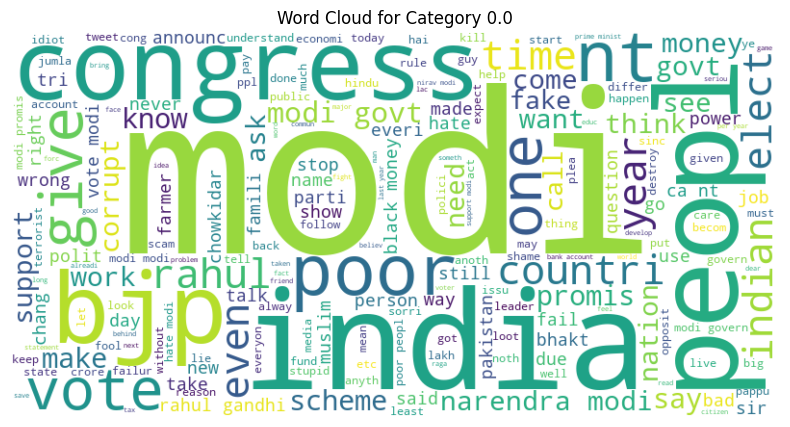

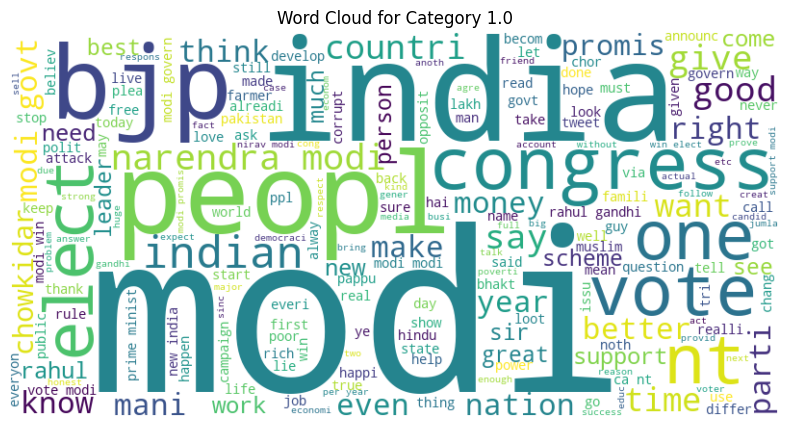

In [90]:
def generate_wordcloud(category):
    text = ' '.join(new_df[new_df['category'] == category]['clean_text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Category {category}')
    plt.axis('off')
    plt.show()

# Generate word cloud for each category
unique_categories = new_df['category'].unique()
for category in unique_categories:
    generate_wordcloud(category)

In [91]:

all_words = ' '.join(new_df['clean_text']).split()
unique_words = set(all_words)

word_freq_df = pd.DataFrame(columns=['unique_word', 'positive', 'negative'])

for word in unique_words:
    positive_count = sum((new_df['category'] == 1) & (new_df['clean_text'].str.contains(re.escape(word))))
    negative_count = sum((new_df['category'] == 0) & (new_df['clean_text'].str.contains(re.escape(word))))
    
    word_freq_df = pd.concat([word_freq_df, pd.DataFrame({'unique_word': [word], 'positive': [positive_count], 'negative': [negative_count]})])

word_freq_df['total'] = word_freq_df['positive'] + word_freq_df['negative']

print(word_freq_df.head())


    unique_word positive negative total
0      contempl        1        1     2
0       akkiget        0        1     1
0       parikar        1        1     2
0  chormahachor        1        0     1
0      disorgan        0        1     1


# For avoiding the high computational cost, we will save the result into a CSV file

In [36]:
word_freq_df.to_csv("Word_frequncy_matrix_7000.csv", index = False)

In [92]:
X = new_df['clean_text']

Y = new_df['category']

X_train = X[:5600]
X_test = X[5600:]

Y_train = Y[:5600]
Y_test = Y[5600:]

In [93]:
def calculate_features(tweet, word_frequency_df):

    words = tweet.split()

    basis_term = 1 
    sum_positive_freq = 0
    sum_negative_freq = 0

    for word in set(words):
        word_info = word_frequency_df[word_frequency_df['unique_word'] == word]
        if not word_info.empty:
            positive_freq = word_info['positive'].iloc[0]
            negative_freq = word_info['negative'].iloc[0]
            sum_positive_freq += positive_freq
            sum_negative_freq += negative_freq

    return [basis_term, sum_positive_freq, sum_negative_freq]


X_train_features = [calculate_features(tweet, word_freq_df) for tweet in X_train]

X_train_features = pd.DataFrame(X_train_features, columns=['Basis Term', 'Sum Positive Frequency', 'Sum Negative Frequency'])

print(X_train_features.head())


   Basis Term  Sum Positive Frequency  Sum Negative Frequency
0           1                    5847                    6312
1           1                    5918                    6270
2           1                    6985                    6715
3           1                    3710                    3581
4           1                    1356                    1462


In [94]:
# Save the DataFrame to a CSV file
X_train_features.to_csv('trained_features_7000.csv', index=False)

In [95]:
X_train_array =X_train_features.values

In [96]:
print(X_train_array)

[[   1 5847 6312]
 [   1 5918 6270]
 [   1 6985 6715]
 ...
 [   1 4487 4759]
 [   1 3854 4030]
 [   1 3939 4167]]


In [97]:
from sklearn.preprocessing import StandardScaler
# Feature scaling 
scaler = StandardScaler()
X_train_features_scaled = scaler.fit_transform(X_train_array)

In [98]:
print(X_train_features_scaled)

[[ 0.          0.88175336  0.99207756]
 [ 0.          0.92851197  0.966189  ]
 [ 0.          1.63120821  1.24048445]
 ...
 [ 0.         -0.01390445  0.03481725]
 [ 0.         -0.43078048 -0.41453418]
 [ 0.         -0.37480187 -0.33008816]]


# Logistic Function 

In [99]:

def compute_sigmoid(z):
    return np.clip(1 / (1 + np.exp(-z)), 1e-15, 1 - 1e-15)


def compute_cost_logistic(X, y, w, b, lambda_reg):
    m = X.shape[0]
    
    z = np.dot(X, w) + b
    h = compute_sigmoid(z)
    
    cost = (-1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h)) + (lambda_reg / (2*m)) * np.sum(w**2)
    
    return np.nan_to_num(cost)

In [100]:
def compute_gradient_logistic(X, y, w, b, lambda_reg):
    m, n = X.shape
    
    z = np.dot(X, w) + b
    h = compute_sigmoid(z)
    
    error = h - y.reshape(-1, 1)
    dw = (1/m) * np.dot(X.T, error) + (lambda_reg / m) * w
    db = np.sum(error) / m
    
    return db, dw

# Final function where Gradient is running

In [105]:

def gradient_descent(X, y, w_in, b_in, alpha, num_iters, lambda_reg, stopping_point=1e-7):
    J_history = []
    w = w_in.copy()
    b = b_in
    
    for i in range(num_iters):
        dj_db, dj_dw = compute_gradient_logistic(X, y, w, b, lambda_reg)
        
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
        cost = compute_cost_logistic(X, y, w, b, lambda_reg)
        J_history.append(cost)
        
        if i % math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {cost}")
        
        # Early stopping if cost is not decreasing or becomes negative
        if i > 0 and J_history[-2] - J_history[-1] < stopping_point:
            print(f"Stopping early at iteration {i}: Cost not decreasing significantly")
            break
        elif cost < 0:
            print(f"Stopping early at iteration {i}: Negative cost detected")
            break
    
    return w, b, J_history

X_train_featured_array = X_train_features_scaled

w_tmp = np.zeros((X_train_array.shape[1], 1))
b_tmp = 0.0
alpha = 0.01
iters = 200000
lambda_reg = 0.01 

w_out, b_out, J_hist = gradient_descent(X_train_featured_array, Y_train.values.reshape(-1, 1), w_tmp, b_tmp, alpha, iters, lambda_reg)

print(f"\nUpdated parameters: w:{w_out}, b:{b_out}")


Iteration    0: Cost 0.6931215102160202
Iteration 20000: Cost 0.613074852822702
Iteration 40000: Cost 0.5852562938626223
Iteration 60000: Cost 0.5733449318768739
Iteration 80000: Cost 0.5675850245607215
Iteration 100000: Cost 0.5645775153550046
Stopping early at iteration 102927: Cost not decreasing significantly

Updated parameters: w:[[ 0.        ]
 [ 6.78689326]
 [-6.94533033]], b:-0.030981074111793273


# Now Checking performance measure

In [106]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def predict(X, w, b):
    z = np.dot(X, w) + b
    h = compute_sigmoid(z)
    return (h >= 0.5).astype(int)

y_train_pred = predict(X_train_featured_array, w_out, b_out)


print("Metrics on Training Data:")
print(f"Accuracy: {accuracy_score(Y_train, y_train_pred)*100}")
print(f"Precision: {precision_score(Y_train, y_train_pred)}")
print(f"Recall: {recall_score(Y_train, y_train_pred)}")
print(f"F1 Score: {f1_score(Y_train, y_train_pred)}")

Metrics on Training Data:
Accuracy: 71.55357142857143
Precision: 0.7014075067024129
Recall: 0.7488372093023256
F1 Score: 0.7243467727980619
